In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def concat_file(directory, name_prefix, name_postfix=r'.csv', na='-', cols=None):
    files = [name for name in os.listdir(directory) if name.startswith(name_prefix) and name.endswith(name_postfix)]
    datas = [pd.read_csv(os.path.join(directory, file), na_values=na, usecols=cols) for file in files]
    return pd.concat(datas)

In [3]:
pdcp_cols = [r'E_RTL2_EI_Node_RLC_PDCP.u8LchId', 
             r'E_RTL2_EI_Node_RLC_PDCP.u16ToPdcpSnFlag',
             r'E_RTL2_EI_Node_RLC_PDCP.u16ToPdcpSn',
             r'E_RTL2_EI_Node_RLC_PDCP.u16PduLen',
             'AirTime']

In [4]:
pdcp_cols[5:]

[]

In [5]:
rlc2pdcp_data = concat_file(r'E:\logtest_data\two_hos_thrpt_var', name_prefix=r'RTL2_RlcInstInfo', cols=pdcp_cols)

In [6]:
rlc2pdcp_data = rlc2pdcp_data.dropna()
rlc2pdcp_data = rlc2pdcp_data[rlc2pdcp_data[pdcp_cols[0]]==10]
rlc2pdcp_pktsp1s = rlc2pdcp_data[pdcp_cols[0]].groupby(rlc2pdcp_data[pdcp_cols[4]]//16000).count()

In [7]:
rlc2pdcp_pktsp1s 

AirTime
484    4960
485    6155
486    5604
487    6451
488    5582
489    6550
490    5790
491    6411
492    6083
493    6066
494    5626
495    6464
496    6070
497    6079
498    6076
499    6083
500    6070
501    6089
502    5989
503    6068
504    5922
505    5563
Name: E_RTL2_EI_Node_RLC_PDCP.u8LchId, dtype: int64

Populating the interactive namespace from numpy and matplotlib


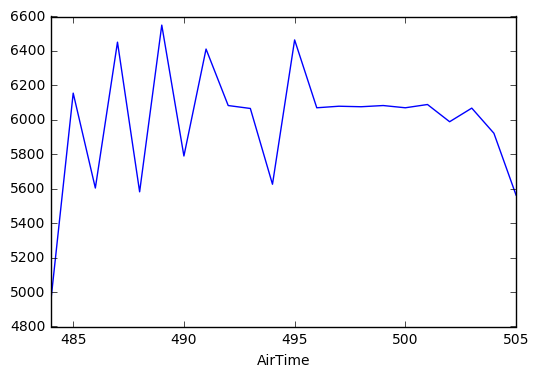

In [8]:
%pylab inline
rlc2pdcp_pktsp1s.plot()

In [9]:
rlc2pdcp_data.to_csv(r'E:\logtest_data\1.csv')

In [10]:
pdcp2rlc_cols = [ r'E_RTL2_EI_Node_RLC_DLUM.u8LchId', r'E_RTL2_EI_Node_RLC_DLUM.u8RecvPdcpDataFlag', r'E_RTL2_EI_Node_RLC_DLUM.u16RecvPdcpSn', 'AirTime']

In [11]:
pdcp2rlc_data = concat_file(r'E:\logtest_data\two_hos_thrpt_var', name_prefix=r'RTL2_RlcInstInfo', cols=pdcp2rlc_cols).dropna()

In [12]:
mask = (pdcp2rlc_data[pdcp2rlc_cols[0]]==13) & (pdcp2rlc_data[pdcp2rlc_cols[1]]==1)
pdcp2rlc_data = pdcp2rlc_data[mask]
pdcp2rlc_pktsp1s = pdcp2rlc_data[pdcp2rlc_cols[2]].groupby(pdcp2rlc_data[pdcp2rlc_cols[3]]//16000).count()

In [13]:
pdcp2rlc_pktsp1s

AirTime
484    4229
485    6155
486    5173
487    6451
488    5582
489    6550
490    5790
491    6411
492    6083
493    5955
494    5626
495    6464
496    6070
497    6079
498    6076
499    6083
500    6070
501    5032
502    6067
503    6068
504    5922
505    5559
Name: E_RTL2_EI_Node_RLC_DLUM.u16RecvPdcpSn, dtype: int64

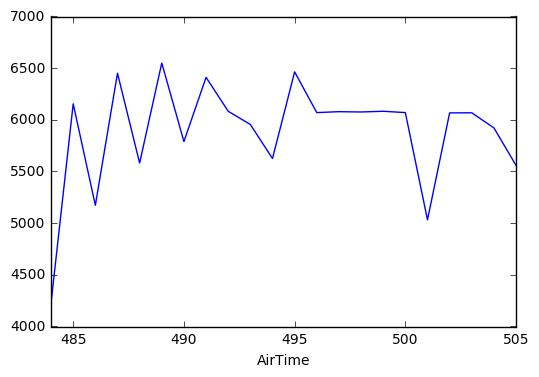

In [14]:
pdcp2rlc_pktsp1s.plot()

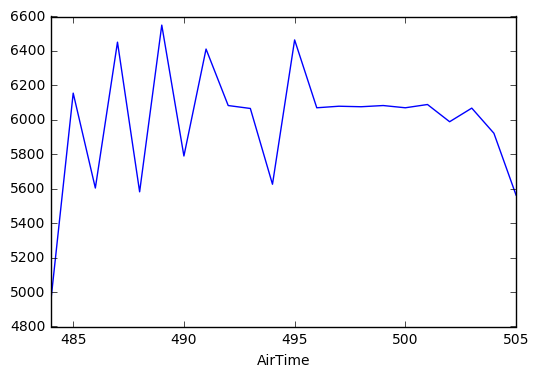

In [15]:
rlc2pdcp_pktsp1s.plot()

In [30]:
pkts = pd.concat([rlc2pdcp_pktsp1s, pdcp2rlc_pktsp1s], axis=1)

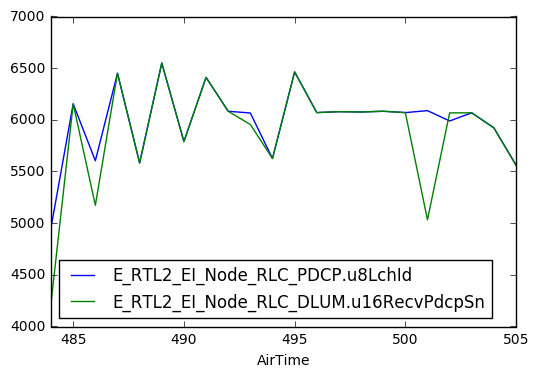

In [32]:
pkts.plot()

In [59]:
Mac2RlcCols = ['AirTime', r'E_RTL2_EI_Node_RLC_ULUM.u8LchId', r'E_RTL2_EI_Node_RLC_ULUM.u16status_vr_ur', r'E_RTL2_EI_Node_RLC_ULUM.u16status_vr_uh']

In [67]:
mac2rlc_data = concat_file(r'E:\logtest_data\two_hos_thrpt_var', name_prefix=r'RTL2_RlcInstInfo', cols=Mac2RlcCols).dropna()

In [78]:
mask = mac2rlc_data[Mac2RlcCols[1]]==10
mac2rlc_data = mac2rlc_data[mask]
#pdcp2rlc_pktsp1s = mac2rlc_data[Mac2RlcCols[2]].groupby(mac2rlc_data[Mac2RlcCols[3]]//16000).count()

In [84]:
mac2rlc_data[Mac2RlcCols[2]] = mac2rlc_data[Mac2RlcCols[2]].diff(1)
mac2rlc_data[Mac2RlcCols[2]] = (mac2rlc_data[Mac2RlcCols[2]]!=0) &(mac2rlc_data[Mac2RlcCols[2]]!=1)

In [85]:
mac2rlc_data = mac2rlc_data.dropna()
mac2rlc_data[:10]

,AirTime,E_RTL2_EI_Node_RLC_ULUM.u8LchId,E_RTL2_EI_Node_RLC_ULUM.u16status_vr_ur,E_RTL2_EI_Node_RLC_ULUM.u16status_vr_uh
39,7746801,10.0,True,574.0
47,7746839,10.0,True,575.0
48,7746840,10.0,True,576.0
49,7746841,10.0,True,577.0
50,7746865,10.0,False,578.0
53,7746896,10.0,False,579.0
54,7746903,10.0,False,580.0
55,7746904,10.0,False,581.0
56,7746905,10.0,False,582.0
57,7746914,10.0,False,583.0


In [91]:
mac2rlc_SnDiscontPkts1s = mac2rlc_data[Mac2RlcCols[2]].groupby(mac2rlc_data[Mac2RlcCols[0]]//16000).sum()*10

In [92]:
mac2rlc_SnDiscontPkts1s

AirTime
484    2740.0
485    2160.0
486    4110.0
487    3000.0
488    3100.0
489    3400.0
490    3330.0
491    2290.0
492    2730.0
493    3130.0
494    3930.0
495    3330.0
496    2670.0
497    3500.0
498    3150.0
499    3170.0
500    3010.0
501    2550.0
502    3940.0
503    2400.0
504    3990.0
505    2000.0
Name: E_RTL2_EI_Node_RLC_ULUM.u16status_vr_ur, dtype: float64

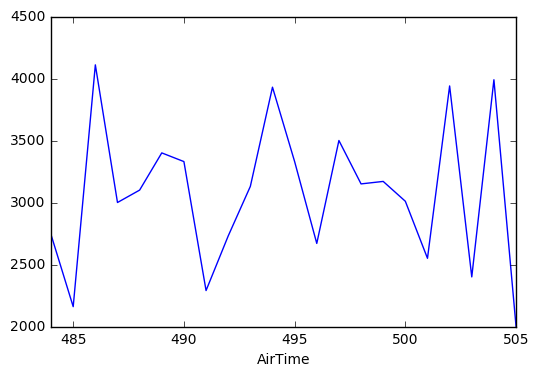

In [93]:
mac2rlc_SnDiscontPkts1s.plot()

In [94]:
pkts = pd.concat([rlc2pdcp_pktsp1s, pdcp2rlc_pktsp1s, mac2rlc_SnDiscontPkts1s], axis=1)

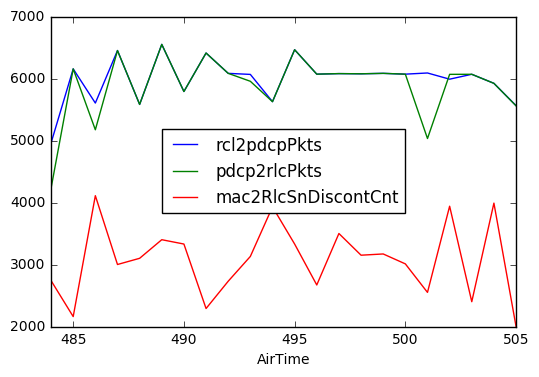

In [96]:
pkts.columns = ['rcl2pdcpPkts', 'pdcp2rlcPkts', 'mac2RlcSnDiscontCnt']
pkts.plot()